<h1><center><strong> ML Night </strong></center></h1>
<h2><center>A competition hosted by the GDSC community</center></h2>

https://www.kaggle.com/competitions/ml-night-gdsc-fst

## 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error as mse 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import sklearn
import math

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from scipy import stats
from xgboost import plot_importance
from datetime import datetime 

## 2. Importing data

In [2]:
train = pd.read_csv("train.csv", index_col='campaign_id')
test = pd.read_csv("test.csv", index_col='campaign_id')
submission = pd.read_csv("Submission Sample.csv")

In [3]:
train

,chain_id,start_date,end_date,format,device,height,width,iremoteid,days,start_day,end_day,shop,budget
campaign_id,,,,,,,,,,,,,
8963,12,2019-07-21,2019-07-24,banner,DESKTOP,200.0,995.0,['31834'],5.0,7.0,3.0,0.0,3579.344177
11875,11,2020-09-01,2020-09-05,butterfly,DESKTOP,486.0,278.0,['C75204'],6.0,2.0,6.0,0.0,5251.781250
25899,11,2020-10-29,2020-11-24,butterfly,DESKTOP,488.0,265.0,['CB9645'],28.0,4.0,2.0,0.0,9814.411865
25458,10,2020-12-09,2020-12-15,banner,DESKTOP,150.0,1200.0,['C111392'],8.0,3.0,2.0,0.0,11428.571429
35293,12,2019-11-14,2019-12-26,banner,DESKTOP,200.0,995.0,['34341'],44.0,4.0,4.0,0.0,9328.322937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5536,11,2021-09-27,2021-10-01,butterfly,DESKTOP,486.0,531.0,['C179459'],6.0,1.0,5.0,0.0,4036.691162
22449,7,2020-11-01,2020-11-04,butterfly,DESKTOP,394.0,576.0,['103287'],5.0,7.0,3.0,0.0,2332.705994
28382,11,2021-01-13,2021-04-01,butterfly,DESKTOP,486.0,273.0,['C119433'],80.0,3.0,4.0,0.0,10850.689697


In [4]:
test

,chain_id,start_date,end_date,format,device,height,width,iremoteid,days,start_day,end_day,shop
campaign_id,,,,,,,,,,,,
126,10,2020-08-28,2020-09-01,butterfly,DESKTOP,420.0,574.0,"['C83953', 'C83957']",6.0,5.0,2.0,0.0
29125,10,2019-07-15,2019-08-10,butterfly,DESKTOP,420.0,574.0,['C31394'],28.0,1.0,6.0,0.0
740,12,2020-06-30,2020-08-31,butterfly,DESKTOP,298.0,398.0,"['C68608', 'C68615', 'C68622']",64.0,2.0,1.0,0.0
3911,10,2020-07-22,2020-08-03,butterfly,DESKTOP,420.0,574.0,['C75293'],14.0,3.0,1.0,0.0
33566,12,2021-06-01,2021-06-11,tg,DESKTOP,298.0,796.0,['C145882'],12.0,2.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2898,12,2020-12-09,2020-12-09,butterfly,DESKTOP,298.0,398.0,['C114289'],2.0,3.0,3.0,0.0
22274,12,2020-05-11,2020-07-02,tg,DESKTOP,298.0,597.0,['C58708'],54.0,1.0,4.0,0.0
24142,12,2021-04-19,2021-05-02,tg,DESKTOP,298.0,796.0,['C143287'],15.0,1.0,7.0,0.0


## 3. Data exploration

In [5]:
print("Number of columns : {}".format(len(train.columns)))

Number of columns : 13


In [6]:
train.describe()

,chain_id,height,width,days,start_day,end_day,shop,budget
count,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000
mean,10.916249,357.299147,656.832999,23.998495,3.062688,4.230441,0.007021,16469.052835
std,1.454780,111.035855,288.019370,27.788634,1.891351,2.181921,0.083508,29185.986940
min,7.000000,15.000000,240.000000,2.000000,1.000000,1.000000,0.000000,779.658020
25%,11.000000,298.000000,398.000000,8.000000,1.000000,2.000000,0.000000,5251.781250
50%,11.000000,350.000000,574.000000,16.000000,3.000000,4.000000,0.000000,8889.082855
75%,12.000000,472.000000,995.000000,29.000000,4.000000,6.000000,0.000000,12610.314751
max,12.000000,1080.000000,2560.000000,298.000000,7.000000,7.000000,1.000000,448000.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3988 entries, 8963 to 8636
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   chain_id    3988 non-null   int64  
 1   start_date  3988 non-null   object 
 2   end_date    3988 non-null   object 
 3   format      3988 non-null   object 
 4   device      3988 non-null   object 
 5   height      3988 non-null   float64
 6   width       3988 non-null   float64
 7   iremoteid   3988 non-null   object 
 8   days        3988 non-null   float64
 9   start_day   3988 non-null   float64
 10  end_day     3988 non-null   float64
 11  shop        3988 non-null   float64
 12  budget      3988 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 436.2+ KB


In [8]:
train['shop'] = train['shop'].astype('int')
train['days'] = train['days'].astype('int')
train['start_day'] = train['start_day'].astype('int')
train['end_day'] = train['end_day'].astype('int')

### Check for null values

In [9]:
train.isna().sum()

chain_id      0
start_date    0
end_date      0
format        0
device        0
height        0
width         0
iremoteid     0
days          0
start_day     0
end_day       0
shop          0
budget        0
dtype: int64

There are no null values in our train dataset.

## Columns

In [10]:
# sns.pairplot(data = train)

In [11]:
to_drop = []

### iremoteid

In [12]:
train['iremoteid_count'] = train['iremoteid'].str.count(',')+1
test['iremoteid_count'] = test['iremoteid'].str.count(',')+1

In [13]:
train['iremoteid_count']

campaign_id
8963     1
11875    1
25899    1
25458    1
35293    1
        ..
5536     1
22449    1
28382    1
1327     1
8636     1
Name: iremoteid_count, Length: 3988, dtype: int64

### chain_id	

In [14]:
train.chain_id.unique()

array([12, 11, 10,  7], dtype=int64)

In [15]:

dummies = pd.get_dummies(train['chain_id'], prefix='chain_id', prefix_sep='_', drop_first=True)
train = pd.concat([train, dummies], axis=1)
train.drop('chain_id', axis=1, inplace=True)


In [16]:

dummies = pd.get_dummies(test['chain_id'], prefix='chain_id', prefix_sep='_', drop_first=True)
test = pd.concat([test, dummies], axis=1)
test.drop('chain_id', axis=1, inplace=True)


### format

In [17]:
train.format.unique()

array(['banner', 'butterfly', 'showcase', 'stoprayon', 'tg', 'shop',
       'lucky cart', 'pmp', 'highco'], dtype=object)

In [18]:
dummies = pd.get_dummies(train['format'], prefix='format', prefix_sep='_', drop_first=True)
train = pd.concat([train, dummies], axis=1)
train.drop('format', axis=1, inplace=True)

In [19]:
dummies = pd.get_dummies(test['format'], prefix='format', prefix_sep='_', drop_first=True)
test = pd.concat([test, dummies], axis=1)
test.drop('format', axis=1, inplace=True)

### device

In [20]:
train.device.unique()

array(['DESKTOP'], dtype=object)

There is only one value in the device column so we have to drop it.

In [21]:
to_drop.append("device")

### iremoteid

In [22]:
len(train.iremoteid.unique())

3986

In [23]:
train.iremoteid

campaign_id
8963       ['31834']
11875     ['C75204']
25899     ['CB9645']
25458    ['C111392']
35293      ['34341']
            ...     
5536     ['C179459']
22449     ['103287']
28382    ['C119433']
1327     ['C153841']
8636       ['29442']
Name: iremoteid, Length: 3988, dtype: object

In [24]:
iremoteid_list = []

for l in list(train.iremoteid):
    for i in l:
        iremoteid_list.append(i)

In [25]:
len(iremoteid_list)

50141

iremoteid should be dropped

In [26]:
to_drop.append("iremoteid")

### days

In [27]:
len(train.days.unique())

156

### shop

In [28]:
test.shop.value_counts()

0.0    1312
1.0      12
Name: shop, dtype: int64

### budget

<AxesSubplot:>

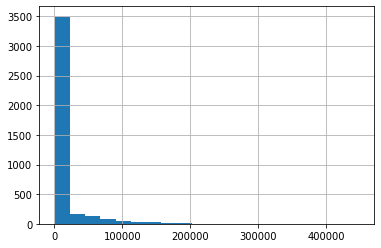

In [29]:
train['budget'].hist(bins=20)

<AxesSubplot:xlabel='budget', ylabel='Density'>

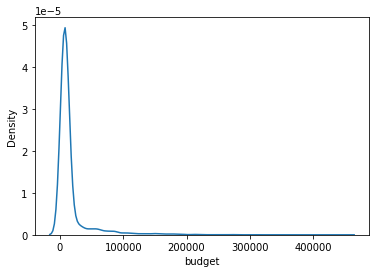

In [30]:
sns.kdeplot(data=train['budget'])

In [31]:
#sns.boxplot(data=train['budget'])

### height

In [32]:
#train['height'], _ = stats.boxcox(train['height'])
#test['height'], _ = stats.boxcox(test['height'])

<AxesSubplot:>

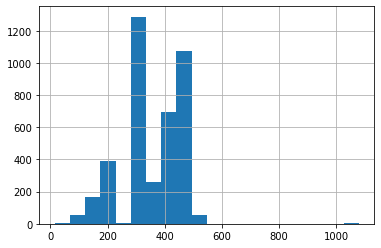

In [33]:
train['height'].hist(bins=20)

<AxesSubplot:xlabel='height', ylabel='Density'>

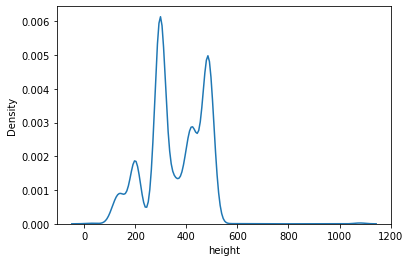

In [34]:
sns.kdeplot(data=train['height'])

### width

In [35]:
#train['width'], _ = stats.boxcox(train['width'])
#test['width'], _ = stats.boxcox(test['width'])

<AxesSubplot:>

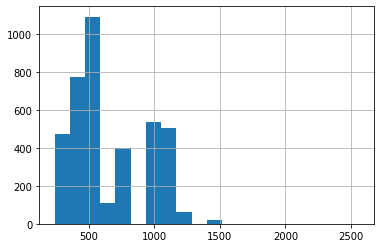

In [36]:
train['width'].hist(bins=20)

<AxesSubplot:xlabel='width', ylabel='Density'>

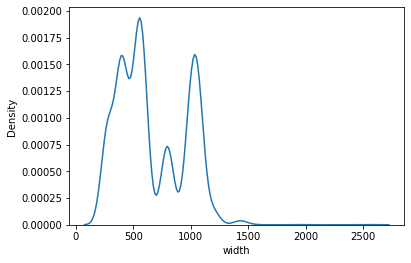

In [37]:
sns.kdeplot(data=train['width'])

### height width product

In [38]:
# train['product'] = train['height']*train['width']
# test['product'] = test['height']*test['width']

In [39]:
train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)

## start_date

In [40]:
train['start_date'] = pd.to_datetime(train['start_date'])
test['start_date'] = pd.to_datetime(test['start_date'])

In [41]:
train['start_date:year'] = train['start_date'].dt.year
test['start_date:year'] = test['start_date'].dt.year

train['start_date:month'] = train['start_date'].dt.month
test['start_date:month'] = test['start_date'].dt.month

train['start_date:day'] = train['start_date'].dt.day
test['start_date:day'] = test['start_date'].dt.day

In [42]:
# train['start_date:is_year_start'] = train['start_date'].dt.is_year_start
# test['start_date:is_year_start'] = test['start_date'].dt.is_year_start


train['start_date:is_quarter_start'] = train['start_date'].dt.is_quarter_start
test['start_date:is_quarter_start'] = test['start_date'].dt.is_quarter_start


train['start_date:is_month_start'] = train['start_date'].dt.is_month_start
test['start_date:is_month_start'] = test['start_date'].dt.is_month_start


train['start_date:is_month_end'] = train['start_date'].dt.is_month_end
test['start_date:is_month_end'] = test['start_date'].dt.is_month_end


In [43]:
train['start_date:is_weekend'] = np.where(train['start_day'].isin([6,7]), 1,0)
test['start_date:is_weekend'] = np.where(test['start_day'].isin([6,7]), 1,0)

## end_date

In [44]:
train['end_date'] = pd.to_datetime(train['end_date'])
test['end_date'] = pd.to_datetime(test['end_date'])

In [45]:
train['end_date:month'] = train['end_date'].dt.month
test['end_date:month'] = test['end_date'].dt.month

train['end_date:day'] = train['end_date'].dt.day
test['end_date:day'] = test['end_date'].dt.day

In [46]:
# train['end_date:is_year_start'] = train['end_date'].dt.is_year_start
# test['end_date:is_year_start'] = test['end_date'].dt.is_year_start


train['end_date:is_quarter_start'] = train['end_date'].dt.is_quarter_start
test['end_date:is_quarter_start'] = test['end_date'].dt.is_quarter_start


train['end_date:is_month_start'] = train['end_date'].dt.is_month_start
test['end_date:is_month_start'] = test['end_date'].dt.is_month_start


train['end_date:is_month_end'] = train['end_date'].dt.is_month_end
test['end_date:is_month_end'] = test['end_date'].dt.is_month_end

In [47]:
train['end_date:is_weekend'] = np.where(train['end_day'].isin([5,6]), 1,0)
test['end_date:is_weekend'] = np.where(test['end_day'].isin([5,6]), 1,0)

## Correlations

In [48]:
cor_matrix = train[['start_date:month', 'end_date:month']].corr().abs()
cor_matrix

,start_date:month,end_date:month
start_date:month,1.000000,0.890023
end_date:month,0.890023,1.000000


In [49]:
train.drop('start_date:month', axis=1, inplace=True)
test.drop('start_date:month', axis=1, inplace=True)

In [50]:
cor_matrix = train[['format_shop', 'shop']].corr().abs()
cor_matrix

,format_shop,shop
format_shop,1.0,1.0
shop,1.0,1.0


In [51]:
train.drop('format_shop', axis=1, inplace=True)
test.drop('format_shop', axis=1, inplace=True)

In [52]:
cor_matrix = train.corr().abs()
#upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

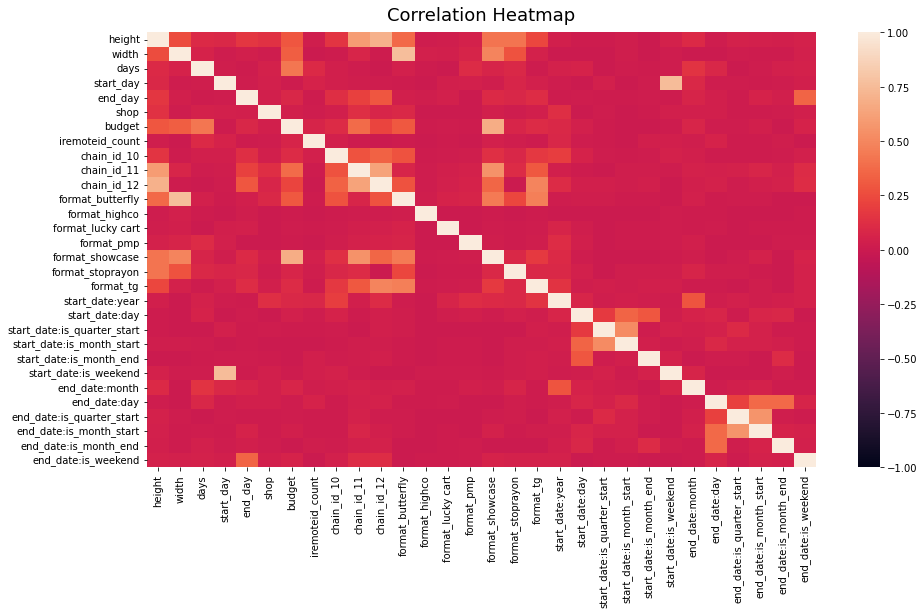

In [53]:
plt.gcf().set_size_inches(15, 8)
heatmap = sns.heatmap(cor_matrix, vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.show()

<AxesSubplot:xlabel='days', ylabel='budget'>

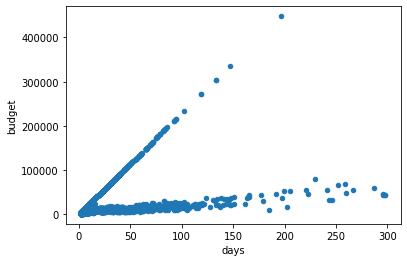

In [54]:
train[['days', 'budget']].plot.scatter(x = 'days', y='budget')

<AxesSubplot:xlabel='height', ylabel='width'>

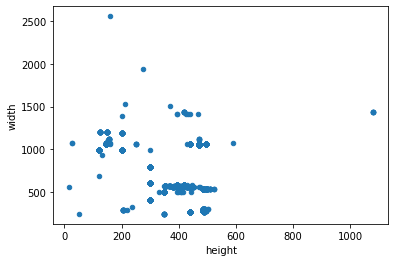

In [55]:
train[['height', 'width']].plot.scatter(x = 'height', y='width')

<AxesSubplot:xlabel='height', ylabel='budget'>

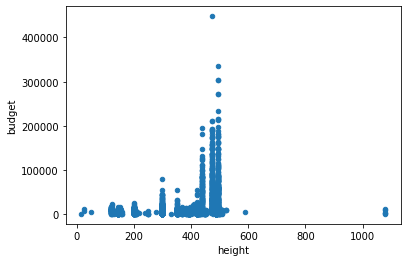

In [56]:
train[['height', 'budget']].plot.scatter(x = 'height', y='budget')

<AxesSubplot:xlabel='width', ylabel='budget'>

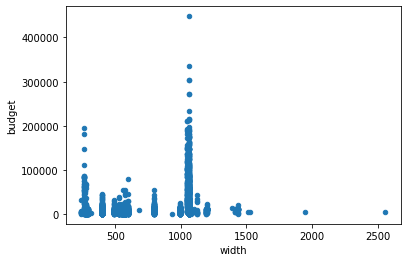

In [57]:
train[['width', 'budget']].plot.scatter(x = 'width', y='budget')

### Format

## 4. Modeling

In [58]:
X = train.drop('budget', axis=1)
y = train['budget']

In [59]:
X.drop(['start_date', 'end_date'], axis=1, inplace=True)

In [60]:
X_train , X_test , y_train ,y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=X['shop'])

### XGBRegressor

In [61]:
# lr = RandomForestRegressor(random_state=456)

param_grid  = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [0, 0.5, 1],
    'min_child_weight': [1, 5, 10]
}

lr = XGBRegressor()

# grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')



# lr.fit(X_train,y_train)

# grid_search.fit(X_train, y_train)

In [62]:
# print("Best hyperparameters: ", grid_search.best_params_)

In [63]:
params = {'gamma': 1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 1000}

In [64]:
lr = xgb.XGBRegressor(**params)
lr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [65]:
y_preds = lr.predict(X_test)
rmse = mse(y_test,y_preds)**(1/2)
print("Test: ", rmse)

y_preds_train = lr.predict(X_train)
rmset = mse(y_train,y_preds_train)**(1/2)
print("Train: ", rmset)

Test:  905.7336203037743
Train:  153.4677600026496


In [66]:
# kf = KFold(n_splits=10)

# # Evaluate the model using cross-validation
# cv_results = xgb.cv(lr.get_params(), xgb.DMatrix(X.drop(['start_date', 'end_date'], axis=1), label=y, enable_categorical=True), num_boost_round=100, folds=kf, metrics="rmse", early_stopping_rounds=10)

# print(cv_results)

# # Get the average RMSE
# avg_rmse = np.sqrt(np.mean(cv_results["test-rmse-mean"]))
# print("Average RMSE:", avg_rmse)


#####cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=777)
# evaluate model
####scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#####scores = [math.sqrt(abs(i)) for i in scores]

####print(scores)
####print(np.array(scores).mean())
####print(np.array(scores).std())

In [67]:
print(lr.feature_importances_)

[1.71935710e-04 4.41498065e-04 3.88189480e-02 3.18623002e-04
 3.33479926e-04 1.67931139e-05 2.31797203e-05 3.08628398e-04
 1.00817226e-04 4.68497747e-04 7.90019258e-05 4.16187362e-07
 3.46896268e-05 5.89280855e-04 9.57547605e-01 3.76062621e-06
 3.57171666e-05 8.13934457e-05 2.05608721e-05 1.52204238e-05
 0.00000000e+00 9.91182333e-06 0.00000000e+00 5.94067897e-05
 3.96010873e-05 3.93306371e-04 0.00000000e+00 4.95741415e-06
 8.26809846e-05]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

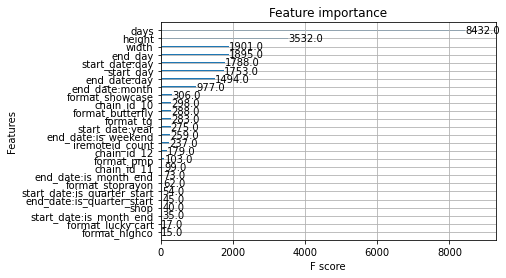

In [68]:
plot_importance(lr)

## 5. Submission

In [69]:
preds = lr.predict(test.drop(['start_date', 'end_date'], axis=1))

In [70]:
submission['budget'] = preds

In [71]:
submission.to_csv('ss.csv',index=False)